In [87]:
import rasterio as rio
#https://stackoverflow.com/questions/67903219/how-to-read-multiband-image-files-with-more-than-4-bands-in-python


# import georasters as gt
import matplotlib.pyplot as plt
import numpy as np

In [88]:
data_loc = '/home/saumya/Documents/NRSC internship/Dataset/MRSDP_SLC_DATA/EOS4_FRS1_SLC/Pauli_Lee5X5/'
# data_loc = '/home/saumya/Documents/NRSC SAR CVNN/Data-sets/MRSDP_SLC_DATA/EOS4_FRS1_SLC/Pauli_Lee5X5/'

# loc_list = ['imagery_HH_421.tif', 'imagery_HH_521.tif', 'imagery_HH_721.tif']
# goblin = '.npy'

In [89]:
# for i in range(3):
#     dat = rio.open(data_loc + loc_list[i])
#     arr1 = dat.read(1)
#     arr2 = dat.read(2)
#     arr3 = np.array(arr1 + 1j*arr2)
#     # arr3 = arr3.reshape(8371, 13619)
#     np.save(data_loc+loc_list[i], arr3)

In [90]:
img = 'Pauli_RGB.tif'

In [91]:
dat = rio.open(data_loc + img)

In [92]:
# using 1 for red, 2 for green and 3 for blue as show in QGIS

arr2 = dat.read(2)
arr3 = dat.read(3)
arr1 = dat.read(1)

In [93]:
arr1_per = arr1/(arr1 + arr2 + arr3)
arr2_per = arr2/(arr1 + arr2 + arr3)
arr3_per = arr3/(arr1 + arr2 + arr3)

In [94]:
arr1_per = arr1_per*100
arr2_per = arr2_per*100
arr3_per = arr3_per*100

In [95]:
# plt.hist(arr1_per)

In [96]:
# plt.hist(arr2_per)

In [97]:
# plt.hist(arr3_per)

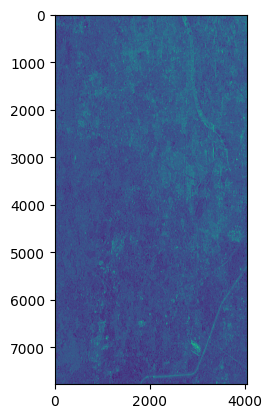

In [98]:
plt.imshow(arr1_per)

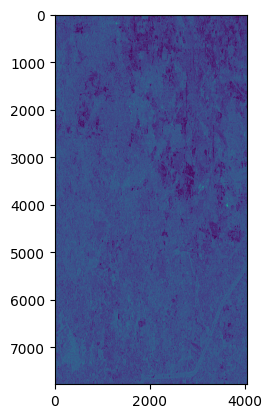

In [99]:
plt.imshow(arr2_per)

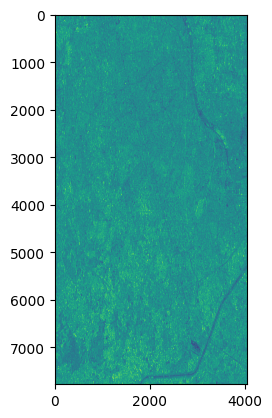

In [100]:
plt.imshow(arr3_per)

In [101]:
arr1_per.shape[1]

4038

In [102]:
count1 = 0
count2 = 0
count3 = 0

mask = np.zeros_like(arr1_per)
for i in range(arr1_per.shape[0]):
    for j in range(arr1_per.shape[1]):
        if arr1_per[i][j] > 50:
            mask[i][j]=1
            count1+=1
        elif arr2_per[i][j] > 50:
            mask[i][j]=2
            count2+=1
        elif arr3_per[i][j] > 50:
            mask[i][j]=3
            count3+=1
            # if arr2_per[i][j] >50:
                # print(arr2_per[i][j])


In [ ]:
import patchify as pat
from collections import Counter

In [ ]:
patches = pat.patchify(mask, (4,4), step=4)

In [ ]:
patches.shape

(7771, 4030, 9, 9)

In [ ]:
def binin(a):
    cot = np.ravel(a).astype(np.int8)
    counts = np.bincount(cot)
    val , count = np.unique(a, return_counts=True)
    print(val, count)
    return(np.argmax(counts))
   
    # ind = np.argmax(count)
    # print(val ,)
    # return(np.argmax(uniq))

In [ ]:
binin(patches[90][22])

[0. 1. 2. 3.] [ 9 19  3 50]


3

In [ ]:
patches[0][0]

array([[3., 1., 1., 3., 3., 1., 3., 1., 1.],
       [0., 2., 2., 2., 3., 2., 2., 0., 3.],
       [0., 3., 1., 3., 3., 0., 0., 3., 3.],
       [2., 3., 3., 3., 3., 3., 3., 3., 0.],
       [3., 3., 3., 0., 2., 3., 3., 1., 0.],
       [2., 3., 3., 3., 3., 3., 3., 2., 2.],
       [3., 3., 3., 3., 2., 3., 3., 0., 2.],
       [0., 3., 3., 3., 0., 3., 1., 0., 3.],
       [3., 3., 3., 0., 0., 3., 3., 3., 3.]], dtype=float32)

In [ ]:
from statistics import mode

In [ ]:
mode(patches[5000][550])

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
count3

17230423

In [ ]:
arr1.size

31411602

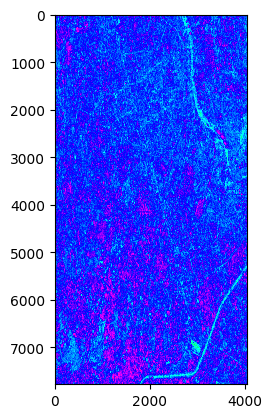

In [ ]:
plt.imshow(mask, cmap='hsv')

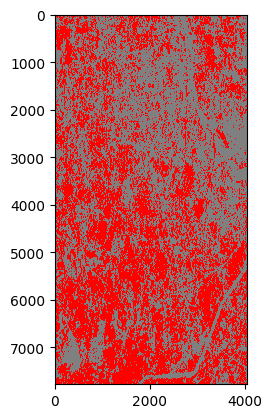

In [ ]:
import matplotlib as mpl

colors = ['white','gray', 'red','blue']
levels = [0, 1, 2, 3]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')

plt.imshow(mask, cmap=cmap, norm=norm)


In [ ]:
# count4 = 0
# for i in mask:
#     for j in i:
#         if j == 1:
#             count4+=1

In [ ]:
# count4

In [ ]:
# count4

In [ ]:
# count4

In [ ]:
479722+479722+479722-31411602

-29972436

In [ ]:
29972436/31411602*100

95.41836166140142

In [ ]:
np.save(data_loc + 'mask', mask)

In [ ]:
#Reading the data file as the input 

file_loc = '/home/saumya/Documents/NRSC internship/Dataset/MRSDP_SLC_DATA/EOS4_FRS1_SLC/scene_HH/'
# file_loc = '/home/saumya/Documents/NRSC SAR CVNN/Data-sets/MRSDP_SLC_DATA/EOS4_FRS1_SLC/scene_HH/'
input_file = 'imagery_HH.tif'

in_data = rio.open(file_loc + input_file)

In [ ]:
real = in_data.read(1)
img = in_data.read(2)

In [ ]:
input_arr = np.array(real + 1j*img,dtype= np.complex64)

In [ ]:
input_arr.dtype

dtype('complex64')

In [ ]:
input_arr[0][0]

(599-410j)

In [ ]:
np.save(file_loc+'input', input_arr)